In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ModuleNotFoundError: No module named 'pandas'

In [4]:
df=pd.read_csv("all_month.csv")

data_url="https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"

df1=pd.read_csv(data_url)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,nc,nc75159082,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.23,0.310,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,ak,ak02549utaqq,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,ak,ak02549uiwrc,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,ak,ak02549uhsis,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,ci,ci40914991,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.86,0.161,16.0,automatic,ci,ci


In [6]:
features = ['latitude', 'longitude', 'depth']
label = 'mag'

In [7]:
# data preprocessing
df = df.dropna(subset=[label])

In [8]:
#doing in features
for col in features:
    df[col]= df[col].fillna(df[col].median())

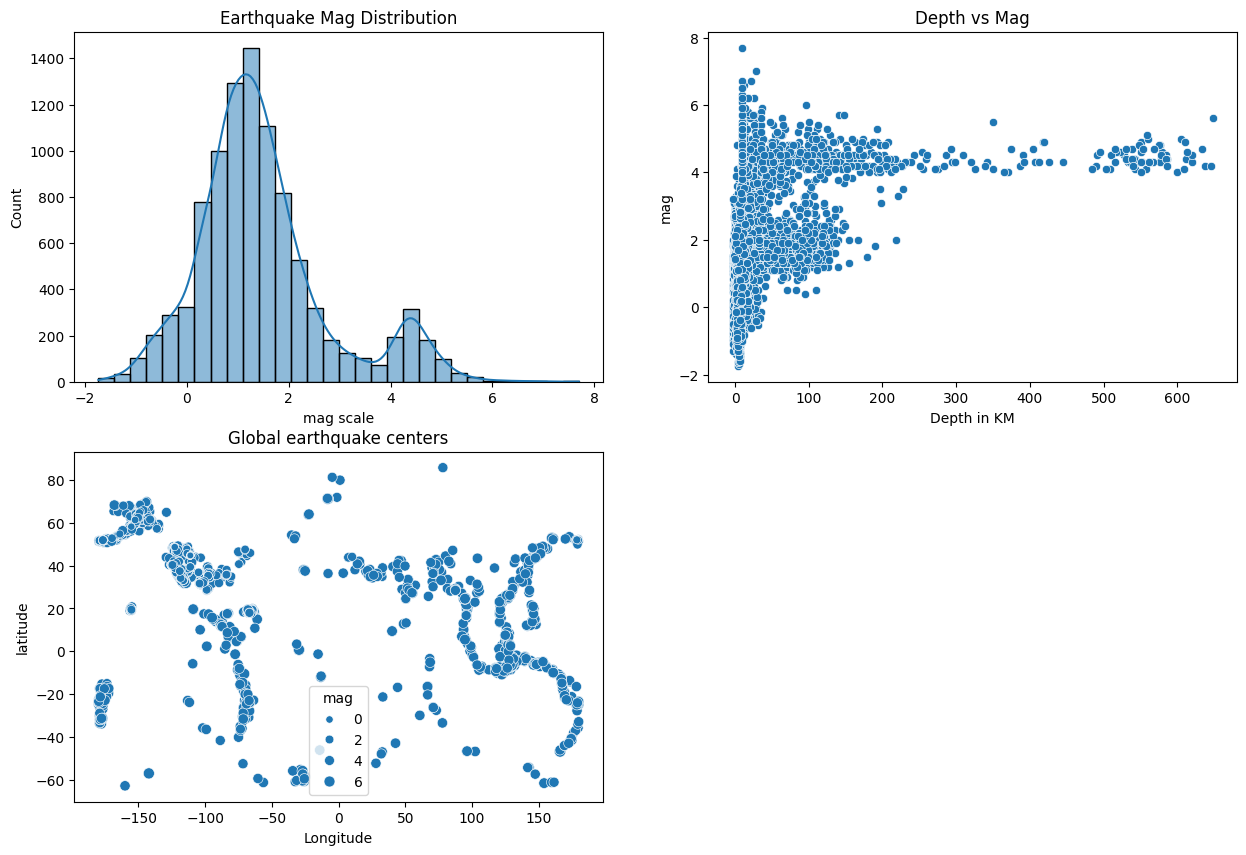

In [9]:
#some basic visuals for data analysis
plt.figure(figsize=(15,10))

#first plot --subplots
plt.subplot(2,2,1)
plt.title("Earthquake Mag Distribution")
plt.xlabel("mag scale")
sb.histplot(df[label],kde=True,bins=30)

# second plot
plt.subplot(2,2,2)
plt.title("Depth vs Mag")
plt.xlabel("Depth in KM")
sb.scatterplot(x='depth', y= label, data=df)

#Globe locations
plt.subplot(2,2,3)
plt.title("Global earthquake centers")
plt.xlabel("Longitude")
plt.ylabel('latitude')
sb.scatterplot(x='longitude', y= 'latitude', size=label,data=df)

plt.show()


In [12]:
#getting features and labels
feature_data=df[features]
label_data = df[label]
print(feature_data)

       latitude   longitude  depth
0     38.840668 -122.834335   1.32
1     61.556800 -141.271600  13.40
2     61.789200 -149.608200  38.70
3     60.081400 -152.528700  97.80
4     35.639833 -117.548500   8.08
...         ...         ...    ...
9588  44.739000 -111.123333   7.15
9589  37.428500 -119.018500   3.69
9590  44.726000 -111.120667   2.38
9591 -57.288500  147.327500  10.00
9592  39.360500 -111.194500  -0.61

[9592 rows x 3 columns]


In [13]:
#split into training and testing data
train_ft,test_ft,train_lb,test_lb=train_test_split(feature_data, label_data, test_size=0.2, random_state=100)

In [14]:
# calling Regressor
model = RandomForestRegressor()

In [15]:
# training data_ 
trained_model = model.fit(train_ft,train_lb)

In [16]:
# precitng
predicted_mag = trained_model.predict(test_ft)
print(predicted_mag)

[0.8692 1.4872 0.0415 ... 1.629  1.221  0.9886]


In [17]:
print(test_lb)


8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [18]:
# doing model evaluation using MSE
error = mean_squared_error(test_lb,predicted_mag)
print("error ",error)

error  0.23834348361877297


In [22]:
# only till 4 points 
print(f"Model MSE : {error:.4f}")

Model MSE : 0.2383


In [23]:
rsquare=r2_score(test_lb, predicted_mag)
print("r2", rsquare)